In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('.\seeds_dataset (1).txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)
df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
df.head(5)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


(198, 8)


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


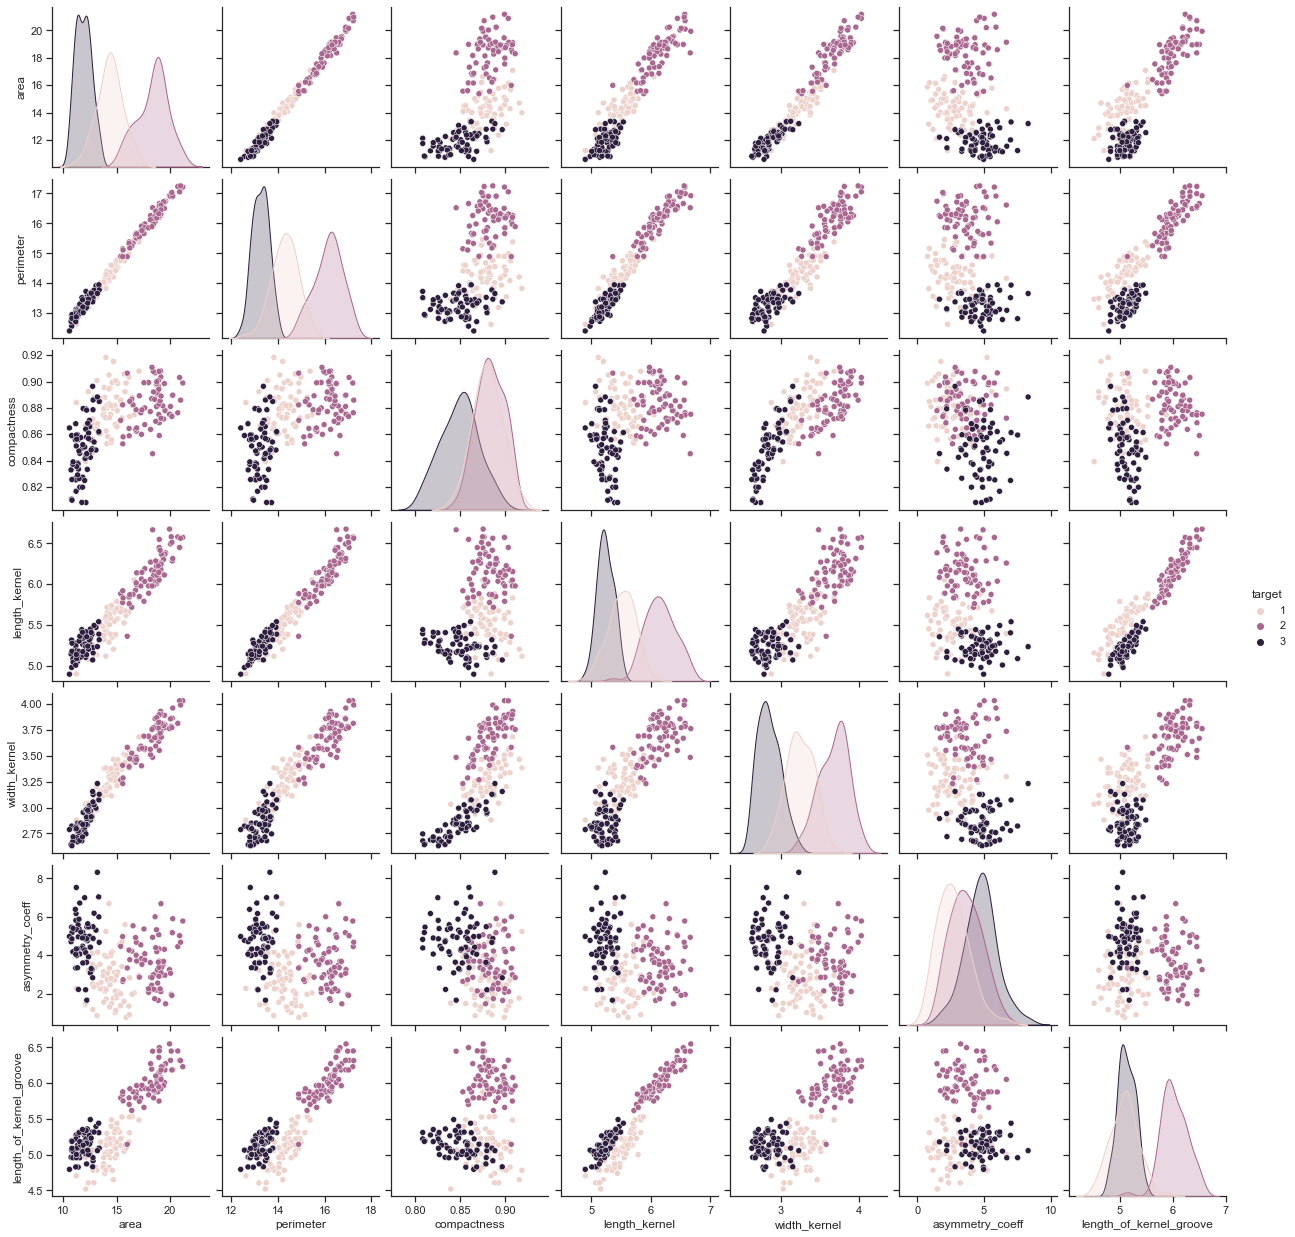

In [3]:
#pair-plot
sns.set(style="ticks", color_codes=True)
pair_plot=sns.pairplot(df,hue='target')

print(df.shape)#198 rows,8 cols
df.describe(include='all')

C:\Users\ramee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width_kernel'>

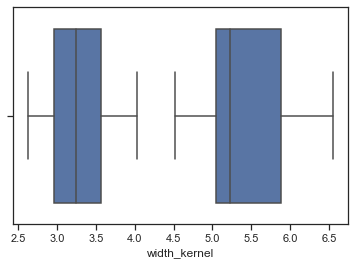

In [7]:
#using pair-plot for feature selection
x, y = df.drop('target',axis=1), df['target']
x = x.drop('compactness',axis=1)
#x = x.drop('length_kernel',axis=1)
x = x.drop('width_kernel',axis=1)

#outlier detection using boxplots
sns.boxplot('length_of_kernel_groove',data=df)
sns.boxplot('width_kernel',data=df)

In [8]:
#Data Scaling
#Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [9]:
#Splitting into train,validation and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=275)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25, random_state=275)

#Variables for k-folds cross-validation
from sklearn.model_selection import cross_val_score
xcv=np.concatenate((X_train, X_val), axis=0)
ycv=np.concatenate((y_train, y_val), axis=0)


In [10]:
#Import performance metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

max__depth=[3,5,10,None]

scoreList1=[]
scoreList2=[]
scoreList3=[]
scoreList4=[]

#Comparing vlassification accuracy if decision tress of different depths
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree
for i in range(len(max__depth)):
    model = tree.DecisionTreeClassifier(max_depth=max__depth[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    scoreList2 = cross_val_score(model, xcv, ycv, cv=10)
    print('scorelist2',max__depth[i],scoreList2)
    print('scorelist2mean',(scoreList2).mean())
    scoreList3.append(scoreList2.mean())
    scoreList1.append((model.score(X_val, y_val))*100)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    scoreList4.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[ 9  1  0]
 [ 0 15  0]
 [ 3  0 12]]
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.94      1.00      0.97        15
           3       1.00      0.80      0.89        15

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.89        40
weighted avg       0.91      0.90      0.90        40

scorelist2 3 [1.         0.9375     0.875      0.9375     0.9375     0.9375
 0.9375     0.875      0.93333333 1.        ]
scorelist2mean 0.9370833333333334
Mean Absolute Error: 0.175
Mean Squared Error: 0.325
Root Mean Squared Error: 0.570087712549569
[[ 9  1  0]
 [ 0 15  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        15

    accuracy                           0.97        40
   macro avg       0.

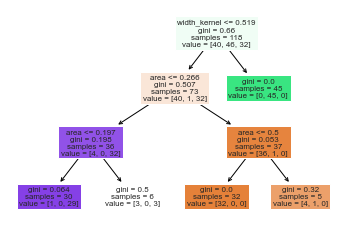

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 4] <= 0.5189561992883682 else to node 8.
	node=1 is a split node: go to node 2 if X[:, 0] <= 0.26628895103931427 else to node 5.
		node=2 is a split node: go to node 3 if X[:, 0] <= 0.19688385725021362 else to node 4.
			node=3 is a leaf node.
			node=4 is a leaf node.
		node=5 is a split node: go to node 6 if X[:, 0] <= 0.4999999850988388 else to node 7.
			node=6 is a leaf node.
			node=7 is a leaf node.
	node=8 is a leaf node.


In [12]:
#Plot and describe DT

cols=df.columns
from sklearn.tree import plot_tree
model2 = tree.DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)
out=tree.plot_tree(model2, filled=True, feature_names= cols)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

n_nodes = model2.tree_.node_count
children_left = model2.tree_.children_left
children_right = model2.tree_.children_right
feature = model2.tree_.feature
threshold = model2.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                   right=children_right[i]))

In [15]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracyScore=accuracy_score(y_test, y_pred)
print("accuracy score is:",accuracyScore*100,'%')

accuracy score is: 97.5 %
